In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from patsy import dmatrices
from matplotlib import pyplot
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [3]:
#Chargement des données 
dataBoursier=pd.read_csv("data/ES=F.csv")
#dataPetrole=pd.read_csv("data/CL=F.csv")
#dataOr=pd.read_csv("data/GC=F.csv")

In [4]:
#ind=pd.date_range('12/01/2016', periods=2)

#dataBoursier.Index=ind
#dataBoursier

#dataBoursier=pd.DataFrame(dataBoursier,index=ind, columns=['Open'=dataBoursier['Open'], 'High', 'Low','Close','Adj.Close','Volume'])
dataBoursier.reset_index(drop=True)
#del dataBoursier['index']
dataBoursier

,Date,Open,High,Low,Close,Adj.Close,Volume
0,2016-12-01,2199.50,2203.00,2186.00,2192.00,2192.00,1960189.0
1,2016-12-02,2190.50,2197.25,2184.25,2192.00,2192.00,2148721.0
2,2016-12-04,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-12-05,2184.00,2208.75,2179.00,2204.25,2204.25,1682042.0
4,2016-12-06,2205.00,2212.00,2200.25,2210.00,2210.00,1663731.0
...,...,...,...,...,...,...,...
323,2017-12-24,NaN,NaN,NaN,NaN,NaN,NaN
324,2017-12-26,2686.75,2689.50,2683.50,2687.00,2687.00,360430.0
325,2017-12-27,2687.50,2691.00,2681.50,2685.50,2685.50,376101.0
326,2017-12-28,2684.00,2689.00,2683.00,2685.75,2685.75,666329.0


In [5]:
dataBoursier

,Date,Open,High,Low,Close,Adj.Close,Volume
0,2016-12-01,2199.50,2203.00,2186.00,2192.00,2192.00,1960189.0
1,2016-12-02,2190.50,2197.25,2184.25,2192.00,2192.00,2148721.0
2,2016-12-04,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-12-05,2184.00,2208.75,2179.00,2204.25,2204.25,1682042.0
4,2016-12-06,2205.00,2212.00,2200.25,2210.00,2210.00,1663731.0
...,...,...,...,...,...,...,...
323,2017-12-24,NaN,NaN,NaN,NaN,NaN,NaN
324,2017-12-26,2686.75,2689.50,2683.50,2687.00,2687.00,360430.0
325,2017-12-27,2687.50,2691.00,2681.50,2685.50,2685.50,376101.0
326,2017-12-28,2684.00,2689.00,2683.00,2685.75,2685.75,666329.0


In [6]:
#Nombre de valeur manquante dans les indice boursier
print(len(dataBoursier) - dataBoursier.count())

Date          0
Open         58
High         58
Low          58
Close        58
Adj.Close    58
Volume       58
dtype: int64


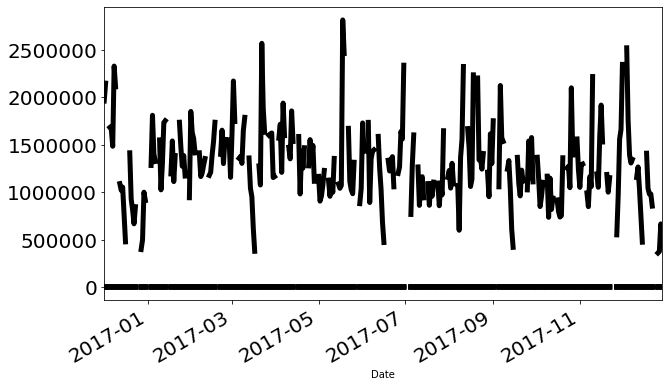

In [7]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('data/ES=F.csv', header=0, index_col=0, parse_dates=True, squeeze=False)
ser=series.head(50)

series.plot(figsize=(10, 6),style='k-',linewidth=5, fontsize=20)
pyplot.legend().set_visible(False)#Masquer la légende
pyplot.show()

In [8]:
#pretraitement des données 
# remplacement des valeurs manques par la dernière valeur non nulle de la serie 
dataBoursier=dataBoursier.fillna(method='ffill',inplace=False)

In [9]:
dataBoursier

,Date,Open,High,Low,Close,Adj.Close,Volume
0,2016-12-01,2199.50,2203.00,2186.00,2192.00,2192.00,1960189.0
1,2016-12-02,2190.50,2197.25,2184.25,2192.00,2192.00,2148721.0
2,2016-12-04,2190.50,2197.25,2184.25,2192.00,2192.00,2148721.0
3,2016-12-05,2184.00,2208.75,2179.00,2204.25,2204.25,1682042.0
4,2016-12-06,2205.00,2212.00,2200.25,2210.00,2210.00,1663731.0
...,...,...,...,...,...,...,...
323,2017-12-24,2686.75,2691.50,2682.25,2686.00,2686.00,853748.0
324,2017-12-26,2686.75,2689.50,2683.50,2687.00,2687.00,360430.0
325,2017-12-27,2687.50,2691.00,2681.50,2685.50,2685.50,376101.0
326,2017-12-28,2684.00,2689.00,2683.00,2685.75,2685.75,666329.0


In [10]:
a = pd.DatetimeIndex(dataBoursier.Date)

In [11]:
import datetime as dt
def timeserie(d):
    return dt.datetime.strptime(dt.datetime.strftime(d, '%Y-%m-%d %H:%M:%S'), "%Y-%m-%d %H:%M:%S")

In [12]:
b = list(map(timeserie, a))

In [13]:

dataBoursier.Date = list(map(dt.datetime.toordinal, a))


In [14]:
dataBoursier.Date

0      736299
1      736300
2      736302
3      736303
4      736304
        ...  
323    736687
324    736689
325    736690
326    736691
327    736692
Name: Date, Length: 328, dtype: int64

In [15]:
#Division des données
from sklearn.model_selection import train_test_split, learning_curve

X = dataBoursier.drop(['Close'], axis=1)
Y = dataBoursier.Close

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

type(X_train)

pandas.core.frame.DataFrame

# Prédiciton 1 (SVR) -- Support Vectore Regressor

In [16]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.svm import SVR, SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

In [17]:
# On crée le pipeline
num_vars = make_column_selector(dtype_include=np.number)
numerical_pipeline = make_pipeline(StandardScaler())

preprocessor = make_column_transformer((numerical_pipeline, num_vars))

model_svr = make_pipeline(preprocessor, SVR())

params = {'svr__kernel': ['rbf', 'linear'],
         'svr__gamma': ['scale', 'auto']}

grid_svr = GridSearchCV(model_svr, params, cv=5)

grid_svr.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d98b06ad0>)])),
  ('svr', SVR())],
 'estimator__verbose': False,
 'estimator__columntransformer': ColumnTransformer(transformers=[('pipeline',
                                  Pipeline(steps=[('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d98b06ad0>)]),
 'estimator__svr': SVR(),
 'estimator__columntransformer__n_jobs': None,
 'estimator__columntransformer__remainder': 'drop',
 'estimator__columntransformer__sparse_threshold': 0.3,
 'estima

In [18]:
grid_svr.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d98b06ad0>)])),
                                       ('svr', SVR())]),
             param_grid={'svr__gamma': ['scale', 'auto'],
                         'svr__kernel': ['rbf', 'linear']})

In [19]:
grid_svr.best_params_

{'svr__gamma': 'scale', 'svr__kernel': 'linear'}

In [20]:
grid_svr.best_score_

0.998364352131252

In [21]:
grid_svr.score(X_test, Y_test)

0.9982793941419199

In [22]:
model_svr_best = grid_svr.best_estimator_

Text(0, 0.5, 'Précision du model')

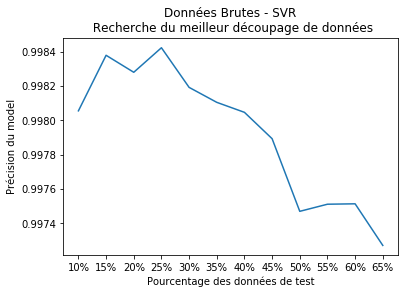

In [23]:
val1 = []
val2= []
for i in range(10, 70, 5):
    X_train_svr, X_test_svr, Y_train_svr, Y_test_svr = train_test_split(X, Y, test_size=i/100, random_state=0)
    val1.append('{}%'.format(i))
    model_svr_best.fit(X_train_svr, Y_train_svr)
    val2.append(model_svr_best.score(X_test_svr, Y_test_svr))

plt.plot(val1, val2)
plt.title("Données Brutes - SVR\n Recherche du meilleur découpage de données")
plt.xlabel("Pourcentage des données de test")
plt.ylabel("Précision du model")

In [24]:
X_train_svr, X_test_svr, Y_train_svr, Y_test_svr = train_test_split(X, Y, test_size=25/100, random_state=0)

In [25]:
model_svr_best.fit(X_train_svr, Y_train_svr)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d98b1a610>)])),
                ('svr', SVR(kernel='linear'))])

In [26]:
model_svr_best.score(X_test_svr, Y_test_svr)

0.9984221155715829

In [27]:
N_svr, train_score_svr, val_score_svr = learning_curve(model_svr_best, X_train_svr, Y_train_svr, train_sizes=np.linspace(0.2, 1, 10))

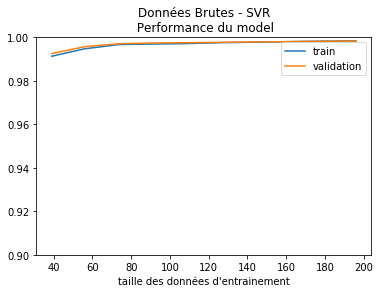

In [28]:
plt.plot(N_svr, train_score_svr.mean(axis=1), label='train')
plt.plot(N_svr, val_score_svr.mean(axis=1), label='validation')
plt.xlabel('taille des données d\'entrainement')
plt.ylim(0.9, 1)
plt.title('Données Brutes - SVR\n Performance du model')
plt.legend()

# Prédiction 2 - Regression linéaire

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
# On crée le pipeline
num_vars = make_column_selector(dtype_include=np.number)
numerical_pipeline = make_pipeline(StandardScaler())

preprocessor = make_column_transformer((numerical_pipeline, num_vars))

model_lin = make_pipeline(preprocessor, LinearRegression())

params = {'linearregression__copy_X': [True, False]}

grid_lin = GridSearchCV(model_lin, params, cv=5)

grid_lin.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d987d3cd0>)])),
  ('linearregression', LinearRegression())],
 'estimator__verbose': False,
 'estimator__columntransformer': ColumnTransformer(transformers=[('pipeline',
                                  Pipeline(steps=[('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d987d3cd0>)]),
 'estimator__linearregression': LinearRegression(),
 'estimator__columntransformer__n_jobs': None,
 'estimator__columntransformer__remainder': 'drop',
 'estimator_

In [31]:
grid_lin.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d987d3cd0>)])),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__copy_X': [True, False]})

In [32]:
grid_lin.best_params_

{'linearregression__copy_X': True}

In [33]:
grid_lin.best_score_

1.0

In [34]:
grid_lin.score(X_test, Y_test)

1.0

In [35]:
model_lin_best = grid_lin.best_estimator_

Text(0, 0.5, 'Précision du model')

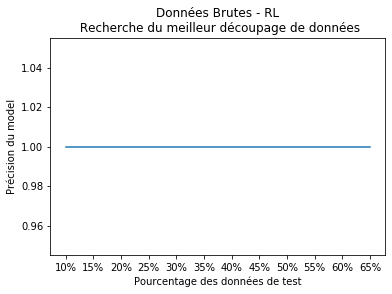

In [36]:
val1 = []
val2= []
for i in range(10, 70, 5):
    X_train_lin, X_test_lin, Y_train_lin, Y_test_lin = train_test_split(X, Y, test_size=i/100, random_state=0)
    val1.append('{}%'.format(i))
    model_lin_best.fit(X_train_lin, Y_train_lin)
    val2.append(model_lin_best.score(X_test_lin, Y_test_lin))

plt.plot(val1, val2)
plt.title("Données Brutes - RL\n Recherche du meilleur découpage de données")
plt.xlabel("Pourcentage des données de test")
plt.ylabel("Précision du model")

In [37]:
X_train_lin, X_test_lin, Y_train_lin, Y_test_lin = train_test_split(X, Y, test_size=25/100, random_state=0)

In [38]:
N_lin, train_score_lin, val_score_lin = learning_curve(model_lin_best, X_train_lin, Y_train_lin, train_sizes=np.linspace(0.2, 1, 10))

/home/jeremie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  """


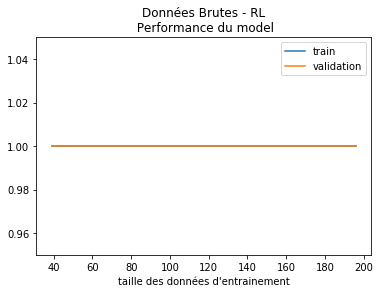

In [39]:
plt.plot(N_lin, train_score_lin.mean(axis=1), label='train')
plt.plot(N_lin, val_score_lin.mean(axis=1), label='validation')
plt.xlabel('taille des données d\'entrainement')
plt.title('Données Brutes - RL\n Performance du model')
plt.ylim(1, 1)
plt.legend()

# Prédiction 3 - algorithme de KNN

In [40]:
from sklearn.neighbors import KNeighborsRegressor as KNN


In [41]:
# On crée le pipeline
num_vars = make_column_selector(dtype_include=np.number)
numerical_pipeline = make_pipeline(StandardScaler())

preprocessor = make_column_transformer((numerical_pipeline, num_vars))

model_knn = make_pipeline(preprocessor, KNN())

params = {'kneighborsregressor__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knn = GridSearchCV(model_knn, params, cv=5)

grid_knn.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d97ec4310>)])),
  ('kneighborsregressor', KNeighborsRegressor())],
 'estimator__verbose': False,
 'estimator__columntransformer': ColumnTransformer(transformers=[('pipeline',
                                  Pipeline(steps=[('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d97ec4310>)]),
 'estimator__kneighborsregressor': KNeighborsRegressor(),
 'estimator__columntransformer__n_jobs': None,
 'estimator__columntransformer__remainder': 'drop',


In [42]:
grid_knn.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d97ec4310>)])),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__algorithm': ['auto', 'ball_tree',
                                                            'kd_tree',
                                                            'brute']})

In [43]:
grid_knn.best_params_

{'kneighborsregressor__algorithm': 'auto'}

In [44]:
grid_knn.best_score_

0.9918241500883933

In [45]:
grid_knn.score(X_test,Y_test)

0.9925810869491545

In [46]:
model_knn_best = grid_knn.best_estimator_

Text(0, 0.5, 'Précision du model')

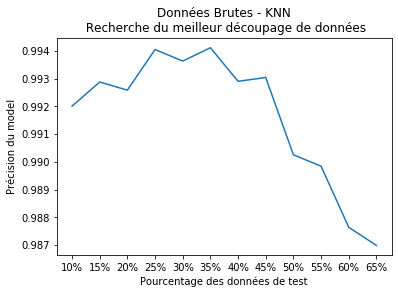

In [47]:
val1 = []
val2= []

for i in range(10, 70, 5):
    X_train_knn, X_test_knn, Y_train_knn, Y_test_knn = train_test_split(X, Y, test_size=i/100, random_state=0)
    val1.append('{}%'.format(i))
    model_knn_best.fit(X_train_knn, Y_train_knn)
    val2.append(model_knn_best.score(X_test_knn, Y_test_knn))

plt.plot(val1, val2)
plt.title("Données Brutes - KNN\n Recherche du meilleur découpage de données")
plt.xlabel("Pourcentage des données de test")
plt.ylabel("Précision du model")

In [48]:
#35% pour un bon score

In [49]:
X_train_knn, X_test_knn, Y_train_knn, Y_test_knn = train_test_split(X, Y, test_size=25/100, random_state=0)

In [50]:
model_knn_best.fit(X_train_knn, Y_train_knn)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d97ec97d0>)])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [51]:
model_knn_best.score(X_test_knn, Y_test_knn)

0.9940437477725849

In [52]:
N_knn, train_score_knn, val_score_knn = learning_curve(model_knn_best, X_train_knn, Y_train_knn, train_sizes=np.linspace(0.2, 1, 10))

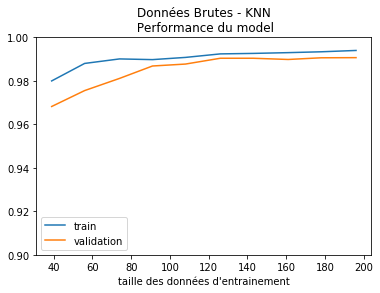

In [53]:
plt.plot(N_knn, train_score_knn.mean(axis=1), label='train')
plt.plot(N_knn, val_score_knn.mean(axis=1), label='validation')
plt.xlabel('taille des données d\'entrainement')
plt.ylim(0.9, 1)
plt.title('Données Brutes - KNN\n Performance du model')
plt.legend()